<a href="https://colab.research.google.com/github/Yerra-Ajay/linear-regression/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[103015.20159796 132582.27760816 132447.73845175  71976.09851259
 178537.48221054 116161.24230163  67851.69209676  98791.73374688
 113969.43533012 167921.0656955 ]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]
[103015.20159796 132582.27760816 132447.73845175  71976.09851259
 178537.48221054 116161.24230163  67851.69209676  98791.73374688
 113969.43533012 167921.0656955 ]
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94]


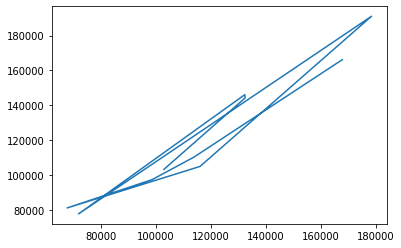

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset from local drive
#from google.colab import files
#uploaded=files.upload()
#import io
#dataset = pd.read_csv(io.BytesIO(uploaded['50_Startups.csv']))

#importing the dataset from Github

url='https://raw.githubusercontent.com/Yerra-Ajay/linear-regression/master/50_Startups.csv'
dataset = pd.read_csv(url)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

# Encoding categorical data
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])
#Creating dummy variables to avoid ordinal

from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([("Name_Of_Your_Step", OneHotEncoder(),[3])], remainder="passthrough")
X = ct.fit_transform(X)


# Avoiding the dummt variable trao
X=X[:,1:]

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Fitting Multiple Linear Regression to Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

#Predicting the test set results
y_pred = regressor.predict(X_test)

print(y_pred)
print(y_test)

#Building the optimaL model using Backward Elimination
# Great team of independent variable which is highly statistically significant
import statsmodels.regression.linear_model as sm
#adding columns of 1s
X = np.append(arr = np.ones((50,1)).astype(int), values = X , axis=1)

X_opt = np.array(X[:, [0, 1, 2, 3, 4, 5]], dtype=float)
# regressor from ols class
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()
# Removing var with highest p values ie 2
X_opt = np.array(X[:,[0,1,3,4,5]], dtype=float)
# regressor from ols classufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Removing var with highest p values ie 4
X_opt = np.array(X[:,[0,3,4,5]], dtype=float)
# regressor from ols class
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Removing var with highest p values ie 5
X_opt = np.array(X[:,[0,3,5]], dtype=float)
# regressor from ols class
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

# Removing var with highest p values ie 
X_opt = np.array(X[:,[0,3]], dtype=float)
# regressor from ols class
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

print(y_pred)
print(y_test)
plt.plot(y_pred,y_test)